In [2]:
# Import Main Libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [68]:
# Load the Dataset from UCI 
# Titanicdata=pd.read_csv(r'C:\MLData\DataSets\Practice_1\titanic.csv.txt')
whitewinedata=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white', sep=';' )
Redwinedata=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red', sep=';' )
whiteWine=pd.DataFrame(whitewinedata)
RedWine=pd.DataFrame(Redwinedata)


In [69]:
whitewinedata.keys()

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [70]:
Redwinedata.keys()

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [71]:
print(whiteWine.shape)
print(RedWine.shape)
wineData=pd.concat([whiteWine,RedWine])
print(wineData.shape)


(4898, 12)
(1599, 12)
(6497, 12)


# Classification Of Quality
The classes are   normal wines than excellent or poor ones

In [72]:
wineData.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [73]:
# describe the data set
wineData.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [74]:
# find out the null values 
wineData.isnull()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,False,False,False,False,False,False,False,False,False,False,False,False
1595,False,False,False,False,False,False,False,False,False,False,False,False
1596,False,False,False,False,False,False,False,False,False,False,False,False
1597,False,False,False,False,False,False,False,False,False,False,False,False


In [75]:
wineData.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

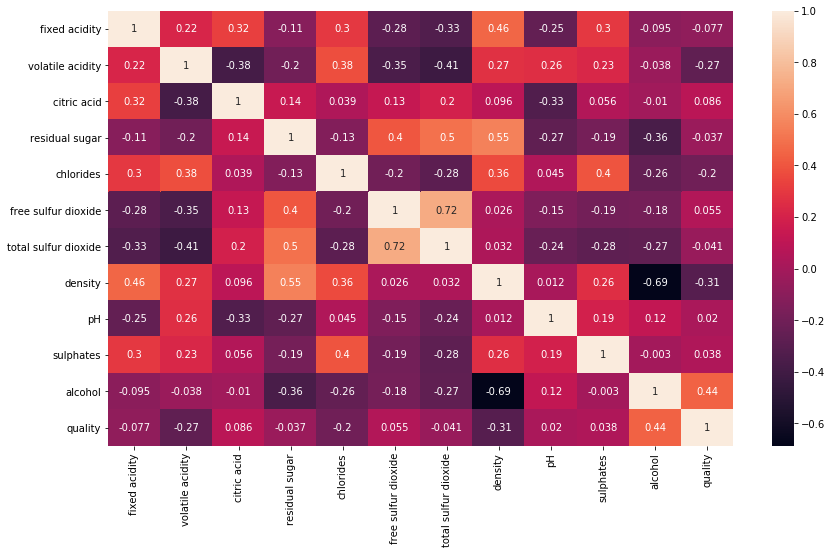

In [91]:
plt.figure(figsize=(14,8))
sns.heatmap(wineData.corr(),annot=True)


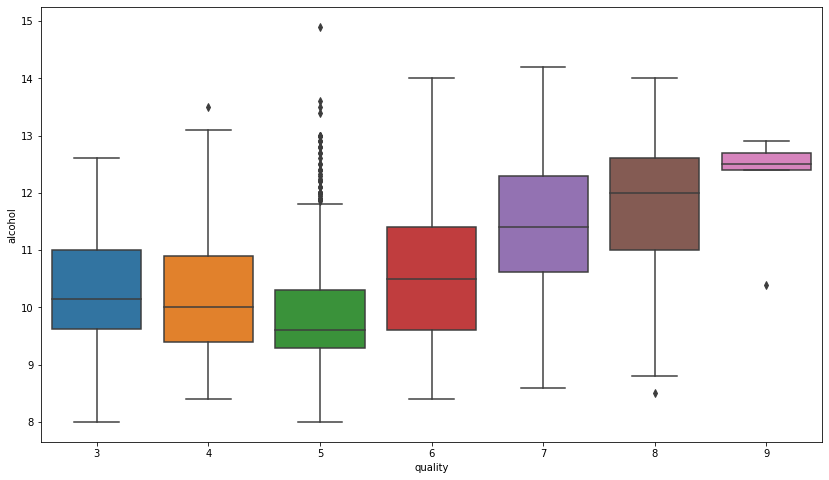

In [100]:
#  normal wines than excellent or poor ones
plt.figure(figsize=(14,8))
sns.boxplot(data=wineData,x="quality",y="alcohol")



In [314]:
# Lets Check Outliers in the Dataset 
df=pd.DataFrame(data=wineData)
from scipy.stats import zscore
print('Before zscore',wineData.shape)
z_score=abs(zscore(wineData))
data=df.iloc[(z_score<3).all(axis=1)]
print('After zscore',data.shape)


Before zscore (6497, 12)
After zscore (5989, 12)


In [311]:
def GetClass(quality) :
    if quality>= 7 :
        return 2  # 'Excellent'   
    elif quality <= 6 and  quality>= 4  :
        return 1  # 'Normal' 
    else : 
        return 0   # 'Poor' 


In [321]:

data['QulaityClass'] = data.apply(lambda x: GetClass(x['quality']), axis=1)



In [322]:
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,QulaityClass
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,1
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,1
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,1
4,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,1
5,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,1


In [323]:
# define X,Y  and it's Shape
y=np.array(data['QulaityClass'])
y=y.reshape(-1,1)
print(y.shape)

data.drop('QulaityClass',axis=1,inplace=True)
data.drop('quality',axis=1,inplace=True)
x=data
print(data.shape)

(5989, 1)
(5989, 11)


In [324]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.22,random_state=42)
# default random random_state=42

In [326]:
# using maxr2_score function will findout random_state

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')
# final_r_state=0
def maxr2_score(regr,x,y):
    max_r_score=0
    for r_state in range(42,101):
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.2)
        regr.fit(x_train,y_train)
        y_pred=regr.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
#         print("r2 score corresponding to",r_state," is " ,r2_scr)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state            
    #print("max r2 score corresponding to",final_r_state," is ",max_r_score)
            return final_r_state

# Define Classification Models 


In [335]:
# import Libraries 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
import warnings
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
#  Cross Validation Libraries 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

KNN=KNeighborsClassifier(n_neighbors=6)
sv=SVC()
LR=LogisticRegression()
DT=DecisionTreeClassifier(random_state=6)
GNB=GaussianNB()
RFC=RandomForestClassifier(n_estimators=100)


In [336]:
models=[]
models.append(("KNeighborsClassifier",KNN))
models.append(("SVC",sv))
models.append(("LogisticRegression",LR))
models.append(("DecisionTreeClassifier",DT))
models.append(("GaussianNB",GNB))
models.append(("RandomForestClassifier",RFC))

*********** KNeighborsClassifier ************




random state value = None
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=6, p=2,
           weights='uniform')


Accuracy_score=  0.808569838619922


Cross_Val_Score=

No handles with labels found to put in legend.


 0.7826052320571447


classification_report
               precision    recall  f1-score   support

           1       0.83      0.96      0.89      1443
           2       0.54      0.21      0.30       354

   micro avg       0.81      0.81      0.81      1797
   macro avg       0.68      0.58      0.59      1797
weighted avg       0.77      0.81      0.77      1797



[[1380   63]
 [ 281   73]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)



*********** SVC ************




random state value = 45
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)


Accuracy_score=  0.8436282693377852




No handles with labels found to put in legend.


Cross_Val_Score= 0.7894502543257714


classification_report
               precision    recall  f1-score   support

           1       0.86      0.97      0.91      1449
           2       0.71      0.33      0.45       348

   micro avg       0.84      0.84      0.84      1797
   macro avg       0.78      0.65      0.68      1797
weighted avg       0.83      0.84      0.82      1797



[[1402   47]
 [ 234  114]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)



*********** LogisticRegression ************




random state value = None
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)


Accuracy_score=  0.8180300500834724


Cross_Val_Score= 0.8061467105152959


classification_report
               precision    recall  f1-score   support

           1       0.84      0.96      0.

No handles with labels found to put in legend.


AxesSubplot(0.125,0.808774;0.62x0.0712264)



*********** DecisionTreeClassifier ************




random state value = 42
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=6,
            splitter='best')


Accuracy_score=  0.8258208124652198




No handles with labels found to put in legend.


Cross_Val_Score= 0.7570645957681235


classification_report
               precision    recall  f1-score   support

           1       0.88      0.90      0.89      1418
           2       0.60      0.54      0.57       379

   micro avg       0.83      0.83      0.83      1797
   macro avg       0.74      0.72      0.73      1797
weighted avg       0.82      0.83      0.82      1797



[[1279  139]
 [ 174  205]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)



*********** GaussianNB ************




random state value = None
GaussianNB(priors=None, var_smoothing=1e-09)


Accuracy_score=  0.7490261547022816


Cross_Val_Score= 0.7609152377708668


classification_report
               precision    recall  f1-score   support

           1       0.87      0.80      0.83      1403
           2       0.44      0.58      0.50       394

   micro avg       0.75      0.75      0.75      1797
   macro avg       0.66      0.69      0.67      1797
weighted avg       0.78      0.75      0.76      17

No handles with labels found to put in legend.





*********** RandomForestClassifier ************




random state value = 42
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


Accuracy_score=  0.8781302170283807




No handles with labels found to put in legend.


Cross_Val_Score= 0.8185000781681845


classification_report
               precision    recall  f1-score   support

           1       0.89      0.96      0.93      1418
           2       0.80      0.56      0.66       379

   micro avg       0.88      0.88      0.88      1797
   macro avg       0.85      0.76      0.79      1797
weighted avg       0.87      0.88      0.87      1797



[[1366   52]
 [ 167  212]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)





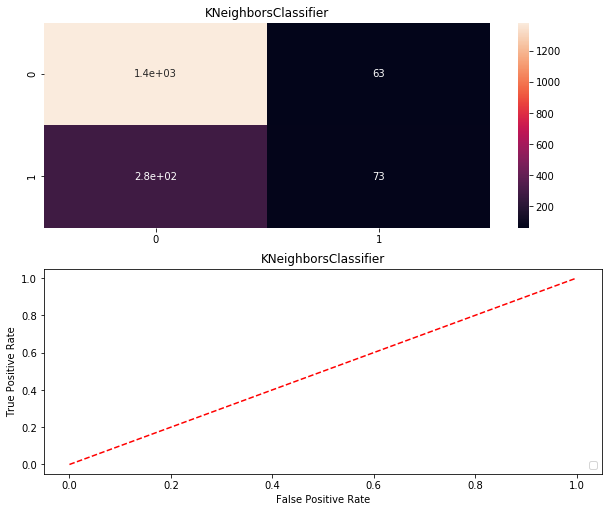

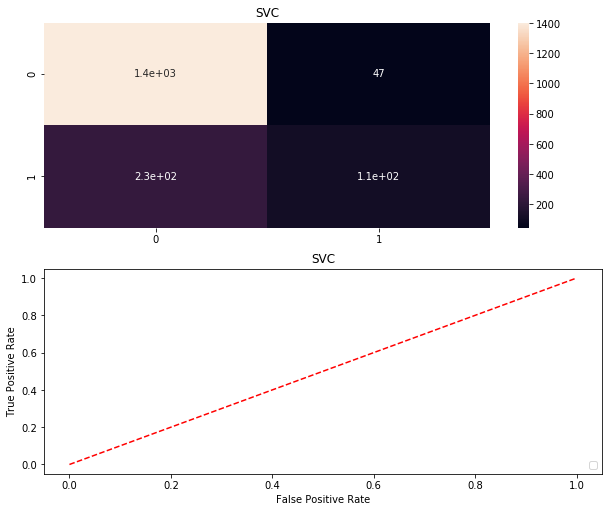

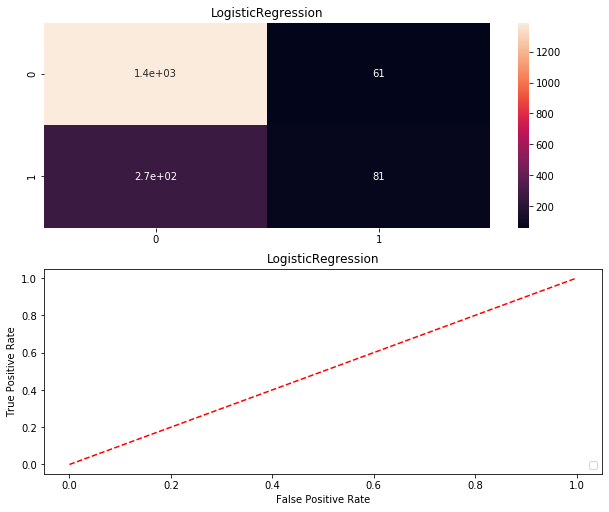

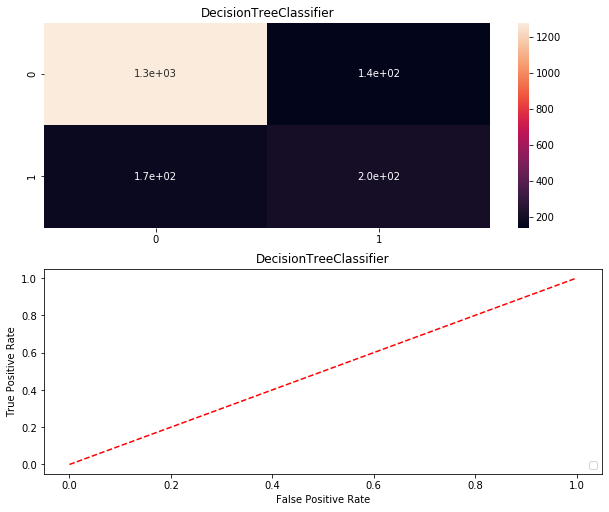

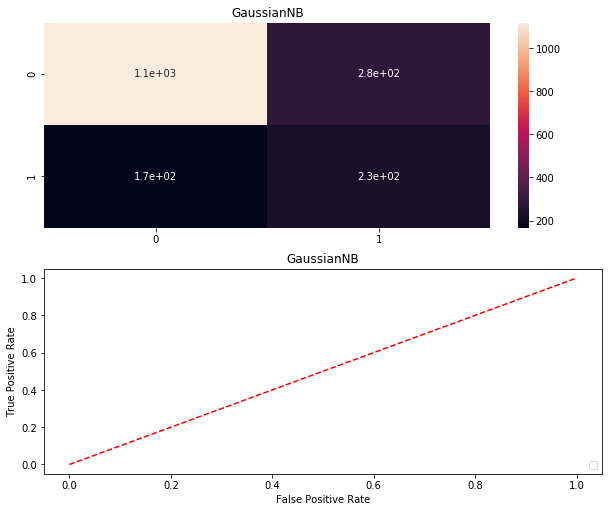

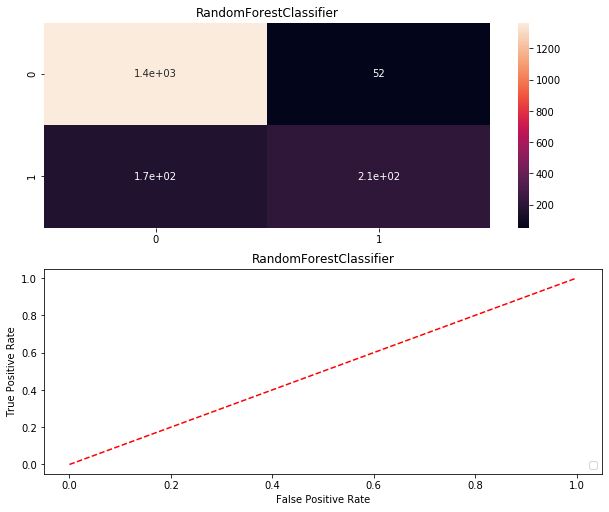

In [352]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,auc
Model=[]
score=[]
cvs=[]
rocscore=[]
for name,model in models:
    print('***********',name,'************')
    print('\n')
    r_state=maxr2_score(model,x,y)
    print('\n')
    print('random state value =',r_state)
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.3)
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pre)
    print('Accuracy_score= ',AS)
    score.append(AS*100)
    print('\n')
    sc=cross_val_score(model,x,y,cv=10,scoring='accuracy').mean()
    print('Cross_Val_Score=',sc)
    cvs.append(sc*100)
    print('\n')
#     false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,pre)
#     roc_auc=auc(false_positive_rate,true_positive_rate)
#     print('roc_auc_score=',roc_auc)
#     rocscore.append(roc_auc*100)
#     print('\n')
    print('classification_report\n',classification_report(y_test,pre))
    print('\n')
    cm=confusion_matrix(y_test,pre)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(name)
#     plt.plot(false_positive_rate,true_positive_rate,label='AUC = %0.2f'% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    print('\n\n')
     


In [359]:
result=pd.DataFrame({'Model':Model,'Accuracy_score':score,'Cross_val_Score':cvs})
result

,Model,Accuracy_score,Cross_val_Score
0,KNeighborsClassifier,80.856984,78.260523
1,SVC,84.362827,78.945025
2,LogisticRegression,81.803005,80.614671
3,DecisionTreeClassifier,82.582081,75.706460
4,GaussianNB,74.902615,76.091524
5,RandomForestClassifier,87.813022,81.850008


In [361]:
# Saving the Model with MAX Accuracy score value 
from sklearn.externals import joblib
joblib.dump(RFC,'RFC_Model')
OuModel=joblib.load('RFC_Model')
OuModel.predict(x_test)

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)